# setup

In [51]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
print("sklearn version: ", sklearn.__version__)
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
print("TF version: ", tf.__version__)
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# GPU test
print("GPU installed: ",tf.test.is_built_with_gpu_support())

# To prevent "CUDNN_STATUS_ALLOC_FAILED" error with GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
    
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")    

from tensorflow.python.keras.utils.data_utils import Sequence

sklearn version:  0.24.2
TF version:  2.8.0
GPU installed:  True
1 Physical GPUs, 1 Logical GPUs


# Get the data

In [2]:
#이승훈
from sklearn import utils
from sklearn.model_selection import train_test_split

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))




loaded_data=np.loadtxt('./datasets/Emnist/emnist-byclass-train.csv', delimiter=",",dtype='uint8')


True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
#이승훈

y_train_full,X_train_full=np.split(loaded_data,[1],axis=1)

In [52]:
#이승훈

loaded_data=np.loadtxt('./datasets/Emnist/emnist-byclass-test.csv', delimiter=",",dtype='uint8')


In [53]:
#이승훈

y_test_full,X_test_full=np.split(loaded_data,[1],axis=1)

In [ ]:
#이승훈
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full, test_size=0.235, random_state=42)
np.savetxt('./datasets/Emnist/train_data.csv',X_train,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/valid_data.csv',X_valid,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/train_label.csv',y_train,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/valid_label.csv',y_valid,fmt='%d',delimiter=',')

os.chdir('../') #원래 디렉토리로

In [54]:
#이승훈
np.savetxt('./datasets/Emnist/test_data.csv',X_test_full,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/test_label.csv',y_test_full,fmt='%d',delimiter=',')

In [68]:
#작성자 전민재
import csv
def load_Emist(exsitNumpy=False, needTranspose=True,make_train=True,make_valid=True,make_test=True):
    if (exsitNumpy == False):
        #"./emnist-byclass-test.csv"
        #train-set
        #"공용/datasets/Emnist/" 위치에 csv 저장 
        csv_train_data_file = open("./datasets/Emnist/train_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        csv_train_label_file = open("./datasets/Emnist/train_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
    
        
        f_train = csv.reader(csv_train_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_train=csv.reader(csv_train_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        #valid-set
    
        csv_valid_data_file = open("./datasets/Emnist/valid_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        csv_valid_label_file = open("./datasets/Emnist/valid_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        
        f_valid = csv.reader(csv_valid_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_valid = csv.reader(csv_valid_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        
        
        #test-set
    
        csv_test_data_file = open("./datasets/Emnist/test_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        csv_test_label_file = open("./datasets/Emnist/test_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        
        f_test = csv.reader(csv_test_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_test = csv.reader(csv_test_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        
        
        X_train=[]
        y_train=[]
        X_valid=[]
        y_valid=[]
        X_test=[]
        y_test=[]
        if make_train:
            for i, row in enumerate(f_train):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #train
                #data 추가    
                X_train.append(row)
            for i, row in enumerate(l_train):

                #train
                #label 추가
                y_train.append(int(row[0]))
            
            
        if make_valid:
            for i, row in enumerate(f_valid):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #valid
                #data 추가    
                X_valid.append(row)


            for i, row in enumerate(l_valid):

                #valid
                #label 추가
                y_valid.append(int(row[0]))
                
        if make_test:
            for i, row in enumerate(f_test):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #valid
                #data 추가    
                X_test.append(row)


            for i, row in enumerate(l_test):

                #valid
                #label 추가
                y_test.append(int(row[0]))
            
            
        

        #train
        X_train=np.array(X_train,dtype=np.uint8)
        X_train=X_train.reshape(-1,28,28)
        #valid
        X_valid=np.array(X_valid,dtype=np.uint8)
        X_valid=X_valid.reshape(-1,28,28)
        #test
        X_test=np.array(X_test,dtype=np.uint8)
        X_test=X_test.reshape(-1,28,28)
        
        
        csv_train_data_file.close()
        csv_train_label_file.close()
        csv_valid_data_file.close()
        csv_valid_label_file.close()
        csv_test_data_file.close()
        csv_test_label_file.close()
        #kaggle dataset이 시계반대방향으로 90도 회전 되있고 상하 반전 되어있음
        def rotate_90(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[c][N-1-r] = m[r][c]
            return np.array(ret,dtype=np.uint8)

        def vreflect(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[r][c] = m[r][N-1-c]
            return np.array(ret,dtype=np.uint8)
        
        if needTranspose == True:
            if make_train:
                #train
                #회전
                for idx,i in enumerate(X_train):
                    X_train[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_train):
                    X_train[idx]=vreflect(i)
                np.save('./X_train',X_train)
                np.save('./y_train',y_train)
                
                
            if make_valid:
                #valid
                #회전
                for idx,i in enumerate(X_valid):
                    X_valid[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_valid):
                    X_valid[idx]=vreflect(i)
                np.save('./X_valid',X_valid)
                np.save('./y_valid',y_valid)
            if make_test:

                #test
                #회전
                for idx,i in enumerate(X_test):
                    X_test[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_test):
                    X_test[idx]=vreflect(i)
                    
                np.save('./X_test',X_test)
                np.save('./y_test',y_test)
        
        
        
        
        
   
    X_train=np.load('./X_train.npy')
    y_train=np.load('./y_train.npy')
    X_valid=np.load('./X_valid.npy')
    y_valid=np.load('./y_valid.npy')
    X_test=np.load('./X_test.npy')
    y_test=np.load('./y_test.npy')
    return X_train, y_train, X_valid, y_valid, X_test, y_test


In [69]:
#황성현
#npy 파일이 존재할 경우 exsitNumpy = True, 업으면 False
X_train, y_train, X_valid, y_valid, X_test, y_test = load_Emist(exsitNumpy=False,make_train=False,make_valid=False,make_test=True)
X_train.shape,X_train.dtype

((533917, 28, 28), dtype('uint8'))

# [224,224,3] tensoeflow dataset

In [5]:
X_train_letters = X_train[np.where(y_train>10)]

In [6]:
y_train_letters = y_train[np.where(y_train>10)]

In [7]:
for i in range (3):
    X_train = np.append(X_train,X_train_letters,axis=0)
    y_train = np.append(y_train, y_train_letters,axis=0)

In [8]:
X_train.shape

(1329679, 28, 28)

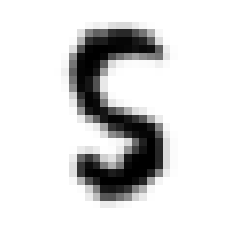

28


In [10]:
#이승훈
import cv2 as cv
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
ids=1
X_new=X_train[ids]
y_new=y_train[ids]
c=X_new.reshape(28,28)


plt.imshow(c, cmap="binary")
plt.axis('off')
plt.show()
print(y_new)

# Prepare the data

In [11]:
#황성현
#data, batch size 성정
train_size=len(X_train)
valid_size=len(X_valid)
batch_size=32
train_size

1329679

In [12]:
#황성현
X_train=np.reshape(X_train,[-1,784])
X_valid=np.reshape(X_valid,[-1,784])
X_train.shape,X_valid.shape

((1329679, 784), (164015, 784))

In [13]:
#황성현
y_train=np.reshape(y_train,[-1,1])
y_valid=np.reshape(y_valid,[-1,1])

y_train.shape,y_valid.shape

((1329679, 1), (164015, 1))

In [14]:
n_inputs = X_train.shape[-1]
print("n_inputs =",n_inputs)

n_inputs = 784


In [15]:
#황성현
def save_to_multiple_csv_files(data, name_prefix, rewrite, header=None, n_parts=10):
    
    Emnist_dir = os.path.join("../공용/datasets", "Emnist")
    os.makedirs(Emnist_dir, exist_ok=True)
    path_format = os.path.join(Emnist_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        if rewrite:
            
            try:
                with open(part_csv, "wt", encoding="utf-8") as f:
                    if header is not None:
                        f.write(header)
                        f.write("\n")
                    for row_idx in row_indices:
                        f.write(",".join([repr(col) for col in data[row_idx]]))
                        f.write("\n")
            except:
                continue
        else:
            try:
                with open(part_csv, "xt", encoding="utf-8") as f:
                    if header is not None:
                        f.write(header)
                        f.write("\n")
                    for row_idx in row_indices:
                        f.write(",".join([repr(col) for col in data[row_idx]]))
                        f.write("\n")
            except:
                continue
    return filepaths

In [16]:
train_full=np.append(X_train,y_train,axis=1)

In [17]:
train_full.shape

(1329679, 785)

In [19]:
valid_full=np.append(X_valid,y_valid,axis=1)

In [18]:
#황성현
train_filepaths = save_to_multiple_csv_files(train_full, "train", n_parts=20,rewrite=False)

In [20]:
#황성현

valid_filepaths = save_to_multiple_csv_files(valid_full, "valid", n_parts=20,rewrite=False)

In [21]:
#황성현
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

def dataaugmentation(X):
    datagen=ImageDataGenerator(rotation_range=40,width_shift_range = 0.2, 
        height_shift_range = 0.2)
    #영어 부분 2배 생성
    #차원변환 
    X=tf.reshape(X,[28,28,1])

    #새로운 데이터 생성
    angle=(random.random()%1)*0.8 - 0.4
    image_result =tfa.image.rotate(X, tf.constant(angle))#rotate -pi/10 ~ pi/10
    shift=(random.random()%1)*2 - 1
    image_result=tfa.image.translate(image_result,[tf.constant(shift),tf.constant(shift)])
    
    return image_result

In [22]:
#황성현
@tf.function
def preprocess_mobilenet_v2(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 10 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize(augment_image, [224, 224])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.mobilenet_v2.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_resnet50(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 10 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize(augment_image, [224, 224])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.resnet50.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_vgg16(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 10 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize(augment_image, [224, 224])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.vgg16.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_renet(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 10 and randomize:
        augment_image = dataaugmentation(x)
        
   
    return augment_image, y

@tf.function
def preprocess_xception(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 10 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize(augment_image, [224, 224])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.xception.preprocess_input(resized_image)
    
    return final_image, y

@tf.function
def preprocess_inception_v3(line,randomize=False):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    x=tf.reshape(x,[28,28,1])
    y = tf.stack(fields[-1:])
    augment_image = x
    if y > 10 and randomize:
        augment_image = dataaugmentation(x)
        
        
    resized_image = tf.image.resize(augment_image, [224, 224])
    if resized_image.shape[2] == 1:
        temp=tf.concat([resized_image,resized_image],2)
        resized_image=tf.concat([temp,resized_image],2)
    final_image = keras.applications.inception_v3.preprocess_input(resized_image)
    
    return final_image, y

In [23]:
#황성현
from enum import Enum
class eModelName(Enum):
    mobilenet_v2 = 0,
    resnet50 = 1,
    vgg16 = 3,
    renet = 4,
    xception = 5,
    inception_v3 = 6
    

In [24]:
#황성현
from functools import partial
def csv_reader_dataset(filepaths, model_name, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=50000,
                       n_parse_threads=5, batch_size=32,randomize=True):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.shuffle(shuffle_buffer_size)
    if model_name == eModelName.mobilenet_v2:
        dataset = dataset.map(partial(preprocess_mobilenet_v2,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.resnet50:
        dataset = dataset.map(partial(preprocess_resnet50,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.vgg16:
        dataset = dataset.map(partial(preprocess_vgg16,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.renet:
        dataset = dataset.map(partial(preprocess_renet,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.xception:
        dataset = dataset.map(partial(preprocess_xception,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    elif model_name == eModelName.inception_v3:
        dataset = dataset.map(partial(preprocess_inception_v3,randomize=randomize), num_parallel_calls=n_parse_threads)
        print(model_name.name)
    dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)

In [25]:
#황성현
#csv_reader_dataset의 파라미터 model_name에 eModelNAme class의 맴버 변수 중 사용할 모델 입력
#ex) model_name = eModelName.inception_v3, model_name = eModelName.renet 
tf.random.set_seed(42)
random.seed(42)
batch_size=32
train_set = csv_reader_dataset(train_filepaths, model_name = eModelName.mobilenet_v2, batch_size=batch_size, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.mobilenet_v2, 
                               batch_size=batch_size, repeat=None, randomize = False)
train_set,valid_set

mobilenet_v2
mobilenet_v2


(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

# [32,32,1] np dataset

In [70]:
#황성현
X_train=tf.reshape(X_train,[-1,28,28,1])
X_valid=tf.reshape(X_valid,[-1,28,28,1])
X_test=tf.reshape(X_test,[-1,28,28,1])

In [71]:
#황성현, jmj
X_train_resize=np.uint8(tf.image.resize(X_train, [32, 32]))
X_valid_resize=np.uint8(tf.image.resize(X_valid, [32, 32]))
X_test_resize=np.uint8(tf.image.resize(X_test, [32, 32]))

In [72]:
#황성현
X_train_resize.shape,X_valid_resize.dtype,X_valid_resize.shape,X_test_resize.shape

((533917, 32, 32, 1), dtype('uint8'), (164015, 32, 32, 1), (116323, 32, 32, 1))

# [32,32,1] augmentation np dataset

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def dataaugmentation(X,y):
    datagen=ImageDataGenerator(width_shift_range = 0.2, 
        height_shift_range = 0.2)

    X_new=[]
    y_new=[]
    #영어 부분 2배 생성
    for i in range(2):
        #X_valid[:10]부분을 교체하고 실행
        for idx,image in enumerate(X):
            #숫자 제외하고 augmentation
            if y[idx]>9:

                #차원변환 
                x=image.reshape(32,32,1)
                x=x[tf.newaxis,...]

                #새로운 데이터 생성
                image_result = next(iter(datagen.flow(x)))
                X_new.append(np.squeeze(image_result))
                y_new.append(y[idx])
    return X_new,y_new

In [ ]:
X_new,y_new=dataaugmentation(X_train_resize,y_train)
X_train_new=np.append(X_train_resize,np.int8((X_new)),axis=0)
y_train_new=np.append(y_train,np.int8(y_new[idx]),)

In [ ]:
#train
np.save('./X_train_aug',X_train_new)
np.save('./y_train_aug',y_train_new)


In [11]:
X_train_aug=np.load('./X_train_aug.npy')
y_train_aug=np.load('./y_train_aug.npy')

In [13]:
X_valid=tf.reshape(X_valid,[-1,28,28,1])
X_valid_resize=np.uint8(tf.image.resize(X_valid, [32, 32]))

X_train_aug.shape,X_valid_resize.shape,X_train.dtype

((1074263, 32, 32, 1), (164015, 32, 32, 1), tf.uint8)

In [73]:
#preprocess input
X_train_aug=keras.applications.mobilenet_v2.preprocess_input(np.array(X_train_aug,np.float32))
X_valid_final=keras.applications.mobilenet_v2.preprocess_input(np.array(X_valid_resize,np.float32))
X_test_final=keras.applications.mobilenet_v2.preprocess_input(np.array(X_test_resize,np.float32))

# Train the model


In [10]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# Baseline 1: Lenet

train & finetuning logs in lenet.ipynb

best lenet

In [15]:
def lenet_model():
    return keras.models.Sequential(
        [
            keras.layers.Conv2D(24, kernel_size=5, strides=1, padding="valid", kernel_initializer="lecun_uniform", input_shape=(32, 32, 1)),
            keras.layers.BatchNormalization(),
            keras.layers.Activation('elu'),
            keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"),
            keras.layers.Conv2D(64, kernel_size=5, strides=1, padding="valid", kernel_initializer="lecun_uniform"),
            keras.layers.BatchNormalization(),
            keras.layers.Activation('elu'),
            keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="valid"),
            keras.layers.Conv2D(480, kernel_size=5, strides=1, padding="valid", kernel_initializer="lecun_uniform"),
            keras.layers.BatchNormalization(),
            keras.layers.Activation('elu'),
            keras.layers.Flatten(),
            keras.layers.Dense(324, kernel_initializer="lecun_uniform"),
            keras.layers.BatchNormalization(),
            keras.layers.Activation('elu'),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(62, activation="softmax"),
        ]
    )

In [17]:
model = lenet_model()
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
logs = "logs/lenet_x4"
tboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=logs, histogram_freq=1, profile_batch="500,520"
)
check_best_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath= "lenet_x4_best.h5", save_best_only=True
)
check_last_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath= "lenet_x4_last.h5", save_best_only=False
)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    x=X_train_resize,
    y=y_train,
    batch_size=256,
    validation_data=(X_valid_resize, y_valid),
    epochs=100,
    callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb],
)

Epoch 1/100
2086/2086 [==============================] - 27s 11ms/step - loss: 0.5575 - accuracy: 0.8149 - val_loss: 0.4166 - val_accuracy: 0.8522
Epoch 2/100
2086/2086 [==============================] - 21s 10ms/step - loss: 0.4236 - accuracy: 0.8485 - val_loss: 0.4048 - val_accuracy: 0.8518
Epoch 3/100
2086/2086 [==============================] - 21s 10ms/step - loss: 0.3971 - accuracy: 0.8558 - val_loss: 0.3842 - val_accuracy: 0.8602
Epoch 4/100
2086/2086 [==============================] - 22s 11ms/step - loss: 0.3801 - accuracy: 0.8601 - val_loss: 0.3690 - val_accuracy: 0.8622
Epoch 5/100
2086/2086 [==============================] - 22s 11ms/step - loss: 0.3672 - accuracy: 0.8638 - val_loss: 0.3668 - val_accuracy: 0.8661
Epoch 6/100
2086/2086 [==============================] - 21s 10ms/step - loss: 0.3564 - accuracy: 0.8671 - val_loss: 0.3674 - val_accuracy: 0.8621
Epoch 7/100
2086/2086 [==============================] - 21s 10ms/step - loss: 0.3469 - accuracy: 0.8700 - val_loss: 0

# Baseline 1: MobilenetV2

train & finetuning logs in

best mobilenetv2

In [18]:
def mobilenetv2_model():
    return keras.applications.MobileNetV2(
        input_shape=(32, 32, 1),
        alpha=1.0,
        include_top=True,
        weights=None,
        input_tensor=None,
        pooling=None,
        classes=62,
        classifier_activation="softmax",
)

In [21]:
model = mobilenetv2_model()
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
logs = "logs/mobilenetv2_batch_64"
tboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir = logs, histogram_freq = 1, profile_batch = "500, 520"
)
check_best_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath = "mobilenetv2_batch_64_best.h5", save_best_only = True
)
check_last_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath = "mobilenetv2_batch_64_last.h5", save_best_only = False
)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history = model.fit(
    x=X_train_resize,
    y=y_train,
    batch_size=64,
    validation_data=(X_valid_resize, y_valid),
    epochs = 100,
    callbacks = [tboard_callback, check_best_cb, check_last_cb, earlystop_cb],
)

Epoch 1/100
8343/8343 [==============================] - 185s 22ms/step - loss: 0.6670 - accuracy: 0.7843 - val_loss: 6.4851 - val_accuracy: 0.5861
Epoch 2/100
8343/8343 [==============================] - 177s 21ms/step - loss: 0.4544 - accuracy: 0.8398 - val_loss: 0.5445 - val_accuracy: 0.8247
Epoch 3/100
8343/8343 [==============================] - 176s 21ms/step - loss: 0.4108 - accuracy: 0.8511 - val_loss: 0.4380 - val_accuracy: 0.8413
Epoch 4/100
8343/8343 [==============================] - 176s 21ms/step - loss: 0.3902 - accuracy: 0.8571 - val_loss: 0.4017 - val_accuracy: 0.8535
Epoch 5/100
8343/8343 [==============================] - 176s 21ms/step - loss: 0.3749 - accuracy: 0.8619 - val_loss: 0.4055 - val_accuracy: 0.8543
Epoch 6/100
8343/8343 [==============================] - 176s 21ms/step - loss: 0.3649 - accuracy: 0.8645 - val_loss: 0.3942 - val_accuracy: 0.8574
Epoch 7/100
8343/8343 [==============================] - 176s 21ms/step - loss: 0.3585 - accuracy: 0.8663 - val_

In [43]:
mobilenetv2=keras.models.load_model("mobilenetv2_batch_64_best.h5")
mobilenetv2.evaluate(X_valid_resize, y_valid)

5126/5126 [==============================] - 52s 10ms/step - loss: 0.3409 - accuracy: 0.8737


[0.3408726453781128, 0.8737493753433228]

# VGG16

In [3]:
#박민성, 황성현
n_classes=62
base_model = keras.applications.vgg16.VGG16(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model_vgg16 = keras.models.Model(inputs=base_model.input, outputs=output)
model_vgg16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
#박민성, 황성현
for layer in base_model.layers:
    layer.trainable = False
model_vgg16.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

check_best_cb = tf.keras.callbacks.ModelCheckpoint("vgg16_best_nadam.h5",save_best_only=True)
check_last_cb = tf.keras.callbacks.ModelCheckpoint("vgg16_last_nadam.h5",save_best_only=False)


history = model_vgg16.fit(train_set,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=2,callbacks=[check_best_cb,check_last_cb])

In [ ]:
#박민성, 황성현
import datetime as dt
for layer in base_model.layers:
    layer.trainable = True
model_vgg16.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])


logs = "logs/" + dt.datetime.now().strftime("VGG16%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
early_stop_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history = model_vgg16.fit(train_set,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[check_best_cb,check_last_cb,tboard_callback,early_stop_cb])

train VGG16 log in VGG16.ipynb

# Resnet50

In [4]:
#박민성, 황성현
n_classes=62
base_model = keras.applications.resnet50.ResNet50(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model_resnet50 = keras.models.Model(inputs=base_model.input, outputs=output)
model_resnet50.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                           

In [ ]:
#박민성, 황성현
for layer in base_model.layers:
    layer.trainable = False

model_resnet50.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])


check_best_cb = tf.keras.callbacks.ModelCheckpoint("resnet50_best_nadam.h5",save_best_only=True)
check_last_cb = tf.keras.callbacks.ModelCheckpoint("resnet50_last_nadam.h5",save_best_only=False)


history = model_resnet50.fit(train_set,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=2,callbacks=[check_best_cb,check_last_cb])

In [ ]:
#박민성, 황성현
import datetime as dt
for layer in base_model.layers:
    layer.trainable = True

model_resnet50.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])


logs = "logs/" + dt.datetime.now().strftime("resnet50%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

early_stop_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model_resnet50.fit(train_set,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[check_best_cb,check_last_cb,tboard_callback,early_stop_cb])

train Resnet50 log in Resnet50.ipynb

# Inceptionv3

In [5]:
#박민성, 황성현
n_classes=62
base_model=tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False)
avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=keras.layers.Dense(n_classes, activation='softmax')(avg)
model_inceptionv3=keras.models.Model(inputs=base_model.input, outputs=output)
model_inceptionv3.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                

In [ ]:
#박민성, 황성현
for layer in base_model.layers:

    layer.trainable = False

model_inceptionv3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",

              metrics=["accuracy"])

 

check_best_cb = tf.keras.callbacks.ModelCheckpoint("inceptionv3_best_nadam.h5",save_best_only=True)

check_last_cb = tf.keras.callbacks.ModelCheckpoint("inceptionv3_last_nadam.h5",save_best_only=False)

 

history = model_inceptionv3.fit(train_set,

                    steps_per_epoch=int(train_size / batch_size),

                    validation_data=valid_set,

                    validation_steps=int(valid_size / batch_size),

                    epochs=2,callbacks=[check_best_cb,check_last_cb])

In [ ]:
#박민성, 황성현
import datetime as dt

for layer in base_model.layers:

    layer.trainable = True

model_inceptionv3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",

              metrics=["accuracy"])

 

check_best_cb = tf.keras.callbacks.ModelCheckpoint("inceptionv3_best_nadam.h5",save_best_only=True)

check_last_cb = tf.keras.callbacks.ModelCheckpoint("inceptionv3_last_nadam.h5",save_best_only=False)

logs = "logs/" + dt.datetime.now().strftime("inceptionv3%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,

                                                 histogram_freq = 1,

                                                 profile_batch = '500,520')

early_stop_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
 

history = model_inceptionv3.fit(train_set,

                    steps_per_epoch=int(train_size / batch_size),

                    validation_data=valid_set,

                    validation_steps=int(valid_size / batch_size),

                    epochs=300,callbacks=[check_best_cb,check_last_cb,tboard_callback,early_stop_cb])

train inceptionv3 log in Inception.ipynb

# SMV2L

In [16]:
#황성현
class Inveted_Residual_Block(keras.layers.Layer):
    def __init__(self,c,s=1,t=1,n=1,**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.layers.ReLU(max_value=6)
        self.main_layers = [
            
            ]
        self.strides_layers=[
           ]
        self.s=s
        self.t=t
        self.c=c
        self.n=n
        
    def build(self,batch_input_shape):
        print(self.name,": batch_input_shape =",batch_input_shape)
        
        self.main_layers = [
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1, 
                                padding="SAME", activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=1,padding="SAME", activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=self.c,kernel_size=1, strides=1,padding="SAME",activation=self.activation),
            ]
        self.strides_layers=[
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1,
                                padding="SAME", activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=self.s,padding="SAME",activation=self.activation),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=self.c, kernel_size=1,strides=1,padding="SAME",activation=self.activation),
        ]

    def call(self, inputs):
        Z = inputs
        
        for n in range(0,self.n):
            if n == 0:
                for layer in self.strides_layers:
                    Z = layer(Z)
            else:
                skip_Z = Z
                for layer in self.main_layers:
                    Z = layer(Z)
                
                Z += skip_Z
    
        return Z
    
    def get_config(self):
        base=super().get_config()
        return{**base,"s":self.s,"t":self.t,"c":self.c,"n":self.n}

In [31]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[224,224,3]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 16)
IRB4 : batch_input_shape = (None, 28, 28, 32)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 IRB1 (Inveted_Residual_Bloc  (None, 112, 112, 16)     2288      
 k)                                                              
                                                                 
 IRB2 (Inveted_Residual_Bloc  (None, 56, 

In [32]:
#황성현
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last.h5",save_best_only=True)
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(train_set, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_last_cb,check_best_cb, earlystop_cb])

In [31]:
smv2_l=keras.models.load_model("smv2l_nadam_last.h5a",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 16)
IRB4 : batch_input_shape = (None, 28, 28, 32)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [32]:
#황성현
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [34]:
#황성현
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L%Y%m%d-%H%M%S")
logs="logs/SMV2L20220525-150153"
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last.h5",save_best_only=True)
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best2.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(train_set, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_last_cb,check_best_cb, earlystop_cb])

Epoch 1/300
41552/41552 [==============================] - 8762s 211ms/step - loss: 0.3231 - accuracy: 0.8801 - val_loss: 1.0675 - val_accuracy: 0.7649
Epoch 2/300
41552/41552 [==============================] - 8739s 210ms/step - loss: 0.2940 - accuracy: 0.8895 - val_loss: 11.2437 - val_accuracy: 0.1270
Epoch 3/300
41552/41552 [==============================] - 8779s 211ms/step - loss: 0.3131 - accuracy: 0.8817 - val_loss: 1.6895 - val_accuracy: 0.7141 accuracy
Epoch 4/300
41552/41552 [==============================] - 8815s 212ms/step - loss: 0.3288 - accuracy: 0.8782 - val_loss: 4.8713 - val_accuracy: 0.3668
Epoch 5/300
41552/41552 [==============================] - 8759s 211ms/step - loss: 0.3198 - accuracy: 0.8804 - val_loss: 1.4416 - val_accuracy: 0.7255los
Epoch 6/300
41552/41552 [==============================] - 8648s 208ms/step - loss: 1.6377 - accuracy: 0.5769 - val_loss: 98.7684 - val_accuracy: 0.0070
Epoch 7/300
41552/41552 [==============================] - 8648s 208ms/ste

# SMV2P

In [ ]:
#황성현
with strategy.scope():
    n_classes=62
    smv2_p=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[224,224,3]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_p.summary()
    smv2_p.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2P%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2p_nadam_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2p_nadam_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_p.fit(train_set, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

train SMV2P log in SMV2P&SMV2B.ipynb

# SMV2B

In [ ]:
#황성현

with strategy.scope():
    n_classes=62
    smv2_b=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[224,224,3]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=24,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=48,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_b.summary()
    smv2_b.compile(loss="sparse_categorical_crossentropy",
                   optimizer="nadam",
                   metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2B%Y%m%d-%H%M%S")
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2b_nadam_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2b_nadam_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
#cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

history=smv2_b.fit(train_set, batch_size = batch_size,
                    steps_per_epoch=int(train_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(valid_size / batch_size),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

train SMV2B log in SMV2P&SMV2B.ipynb

# Select the model

# SMV2L

In [38]:
#황성현 
smv2l=keras.models.load_model("smv2l_nadam_last.h5",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 16)
IRB4 : batch_input_shape = (None, 28, 28, 32)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [39]:
#황성현 
smv2l.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 136s 26ms/step - loss: 1.0651 - accuracy: 0.7656


[1.065091848373413, 0.7656341195106506]

# SMV2P

In [33]:
#황성현 
smv2p=keras.models.load_model("smv2p_nadam_best.h5",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 32)
IRB4 : batch_input_shape = (None, 28, 28, 64)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [34]:
#황성현 
smv2p.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 149s 28ms/step - loss: 1.3054 - accuracy: 0.7546


[1.305375337600708, 0.7546097636222839]

# SMV2B

In [35]:
#황성현 
mv2b=keras.models.load_model("smv2b_nadam_best.h5",custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 112, 112, 32)
IRB2 : batch_input_shape = (None, 112, 112, 16)
IRB3 : batch_input_shape = (None, 56, 56, 24)
IRB4 : batch_input_shape = (None, 28, 28, 48)
IRB5 : batch_input_shape = (None, 14, 14, 64)
IRB6 : batch_input_shape = (None, 7, 7, 128)


In [36]:
#황성현 
smv2b.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 158s 30ms/step - loss: 1.8271 - accuracy: 0.6875


[1.827067255973816, 0.6874512434005737]

# VGG16

In [37]:
#황성현 
vgg16=keras.models.load_model("vgg16_best_nadam.h5")

In [ ]:
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.vgg16 , 
                               batch_size=batch_size, repeat=None, randomize = False)

In [38]:
#황성현 
vgg16.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 512s 99ms/step - loss: 2.1865 - accuracy: 0.6587


[2.1864590644836426, 0.6587256193161011]

# Resnet

In [41]:
#황성현 
resnet50=keras.models.load_model("resnet50_best_nadam.h5")

In [43]:
#황성현 
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.resnet50, 
                               batch_size=batch_size, repeat=None, randomize = False)

resnet50


In [44]:
#황성현 
resnet50.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 348s 68ms/step - loss: 4.4647 - accuracy: 0.5483


[4.464682579040527, 0.5483048558235168]

# InceptionV3

In [41]:
#황성현 
inceptionv3=keras.models.load_model("inceptionv3_best_nadam.h5")

In [ ]:
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.inception_v3  , 
                               batch_size=batch_size, repeat=None, randomize = False)

In [42]:
inceptionv3.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 236s 46ms/step - loss: 3.1794 - accuracy: 0.6305


[3.1794281005859375, 0.6305426955223083]

# Xception

In [26]:
Xception=keras.models.load_model("xception_best_nadam.h5")

In [28]:
valid_set = csv_reader_dataset(valid_filepaths, model_name = eModelName.xception, 
                               batch_size=batch_size, repeat=None, randomize = False)

xception


In [29]:
Xception.evaluate(valid_set,steps=int(valid_size / batch_size))

5125/5125 [==============================] - 375s 72ms/step - loss: 4.9617 - accuracy: 0.5064


[4.961658954620361, 0.5064146518707275]

in validation set, SMV2L has 26ms/step inferance time and  0.7656 accuracy,
SMV2P has 28ms/step inferance time and 0.7546 accuracy
SMV2L is best, SMV2P is second

we find that [224,224,3] input size very big, so we change input size to [32,32,1], delete data augmentation, and train on two model

# MobilenetV2

In [23]:
mobilenetv2=keras.models.load_model("mobilenetv2_batch_64_best.h5")
mobilenetv2.evaluate(X_valid_resize, y_valid)

5126/5126 [==============================] - 38s 7ms/step - loss: 0.3409 - accuracy: 0.8737


[0.3408726155757904, 0.8737493753433228]

# Lenet

In [24]:
lenet=keras.models.load_model("lenet_x4_best.h5")
lenet.evaluate(X_valid_resize, y_valid)

5126/5126 [==============================] - 12s 2ms/step - loss: 0.3529 - accuracy: 0.8692


[0.35291048884391785, 0.8691887855529785]

# SMV2P

In [17]:
#황성현
with strategy.scope():
    n_classes=62
    smv2_p=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_p.summary()
    smv2_p.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 32)
IRB4 : batch_input_shape = (None, 4, 4, 64)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_5 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 32)          9856      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 64)    

In [18]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2P_NP%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 )
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2p_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2p_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

history=smv2_p.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

logs/SMV2P_NP20220603-203609
Epoch 1/300
INFO:tensorflow:batch_all_reduce: 116 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 116 all-reduces with algorithm = nccl, num_packs = 1
16685/16685 [==============================] - 593s 34ms/step - loss: 0.7839 - accuracy: 0.7547 - val_loss: 0.4886 - val_accuracy: 0.8305
Epoch 2/300
16685/16685 [==============================] - 564s 34ms/step - loss: 0.4895 - accuracy: 0.8291 - val_loss: 0.4362 - val_accuracy: 0.8448
Epoch 3/300
16685/16685 [==============================] - 565s 34ms/step - loss: 0.4553 - accuracy: 0.8392 - val_loss: 0.4216 - val_accuracy: 0.8449
Epoch 4/300
16685/16685 [==============================] - 565s 34ms/step - loss: 0.4368 - accuracy: 0.8446 - val_loss: 0.4119 - val_accuracy: 0.8510
Epoch 5/300
16685/16685 [==============================] - 564s 34ms/step - loss: 0.4271 - accuracy: 0.8471 - val_loss: 0.4103 - val_accuracy: 0.8519
Epoch 6/300
16685/16685 [======================

# SMV2L

In [76]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 32, 32, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        320       
                                                                 
 IRB1 (Inveted_Residual_Bloc  (None, 16, 16, 16)       2288      
 k)                                                              
                                                                 
 IRB2 (Inveted_Residual_Bloc  (None, 8, 8, 16)   

In [77]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2L_NP%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1)
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

logs/SMV2L_NP20220609-162807
Epoch 1/300
16685/16685 [==============================] - 1276s 76ms/step - loss: 0.7813 - accuracy: 0.7554 - val_loss: 0.5048 - val_accuracy: 0.8269 - lr: 0.0010
Epoch 2/300
16685/16685 [==============================] - 1377s 83ms/step - loss: 0.4711 - accuracy: 0.8339 - val_loss: 0.4283 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 3/300
16685/16685 [==============================] - 1379s 83ms/step - loss: 0.4345 - accuracy: 0.8447 - val_loss: 0.4092 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 4/300
16685/16685 [==============================] - 1375s 82ms/step - loss: 0.4179 - accuracy: 0.8492 - val_loss: 0.4004 - val_accuracy: 0.8531 - lr: 0.0010
Epoch 5/300
16685/16685 [==============================] - 1370s 82ms/step - loss: 0.4058 - accuracy: 0.8523 - val_loss: 0.3916 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 6/300
16685/16685 [==============================] - 1369s 82ms/step - loss: 0.3973 - accuracy: 0.8550 - val_loss: 0.3918 - val_accuracy: 0.8574 

# 민재형 이거 실행해주세요!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2L_NP%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1)
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])

SMV2L is best model! we use only SMV2L

# Fine Tune the model

# Batch size up

# Batch 64

In [ ]:
n_classes=62
smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
smv2_l.summary()
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#천문성
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_BATCH64_%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
batch_size=64
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch64_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch64_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),                   
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])


train logs in SMV2L_batch_up.ipynb

In [17]:
smv2_l=keras.models.load_model("smv2l_nadam_batch64_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 41s 7ms/step - loss: 0.3501 - accuracy: 0.8714


[0.3500642478466034, 0.8713958859443665]

# Batch 128

In [ ]:


n_classes=62
smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
smv2_l.summary()
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#천문성
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_BATCH128_%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
batch_size=128
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch128_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_batch128_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),                   
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb])


train logs in SMV2L_batch_up.ipynb

In [18]:
smv2_l=keras.models.load_model("smv2l_nadam_batch128_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 36s 7ms/step - loss: 0.3537 - accuracy: 0.8674


[0.35373783111572266, 0.8674450516700745]

# Batch size up & Learning rateup

# smv2l when batch_size=64, lr=0.002 by minsung

In [21]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_9 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 16)          6688      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 32)    

In [22]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.002)
batch_size=64
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:


#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_batch_64_lr_002%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

check_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2L_batch_64_lr_002.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_cb, earlystop_cb])



train logs in np_batch_lr_up_tunining.ipynb

In [ ]:
smv2_l=keras.models.load_model("SMV2L_batch_64_lr_002.h5",
                              custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

In [31]:
smv2_l.evaluate(X_valid_resize,y_valid)

5126/5126 [==============================] - 37s 7ms/step - loss: 0.3861 - accuracy: 0.8584


[0.38609299063682556, 0.8584336638450623]

# smv2l when batch_size=256, lr=0.008 by minsung, seounghyun

In [33]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 16)          6688      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 32)    

In [34]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.008)
batch_size=256
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_batch_256_lr_008%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

check_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2L_batch_256_lr_008.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_cb, earlystop_cb])

train logs in np_batch_lr_up_tunining.ipynb

In [35]:
smv2_l=keras.models.load_model("SMV2L_batch_256_lr_008.h5",
                              custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


In [36]:
smv2_l.evaluate(X_valid_resize,y_valid)

5126/5126 [==============================] - 34s 6ms/step - loss: 0.4856 - accuracy: 0.8300


[0.4856473207473755, 0.8299667835235596]

valid loss is not good. but in train logs, this model arrived 80% accuracy fastly, so we decided use this with learning rate schedular

In [37]:
#황성현
n_classes=62
smv2_l=keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[32,32,1]),
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
    Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
    Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
    Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
    Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
    Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
    Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
    keras.layers.ReLU(max_value=6),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(n_classes,activation="softmax")
])
smv2_l.summary()

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_13 (Batc (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        320       
_________________________________________________________________
IRB1 (Inveted_Residual_Block (None, 16, 16, 16)        2288      
_________________________________________________________________
IRB2 (Inveted_Residual_Block (None, 8, 8, 16)          6688      
_________________________________________________________________
IRB3 (Inveted_Residual_Block (None, 4, 4, 32)    

In [38]:
opt = tf.keras.optimizers.Nadam(learning_rate=0.008)
batch_size=256
smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_batch_256_lr_008_sch_exp%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
def scheduler(epoch, lr):
    if epoch < 2:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
check_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2L_batch_256_lr_008_sch_exp.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_cb, earlystop_cb,lr_callback])

train logs in np_batch_lr_up_tunining.ipynb

In [41]:
smv2_l=keras.models.load_model("SMV2L_batch_256_lr_008_sch_exp.h5",
                              custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


In [43]:
smv2_l.evaluate(X_valid_resize,y_valid,batch_size=256)

641/641 [==============================] - 5s 8ms/step - loss: 0.3488 - accuracy: 0.8723


[0.34879040718078613, 0.872304379940033]

it arrived 87% accuracy faster than 32 batch size, 0.001 learning rate. So we try to finetune with batch size up learning rate up 

# Optimizer 

finetuning - optimizer logs in np_SMV2_optimizer.ipynb

adam

In [ ]:

    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2L_NP_ADAM%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,lr_callback])

In [70]:
smv2_l=keras.models.load_model("smv2l_adam_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid,batch_size=32)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 28s 5ms/step - loss: 0.3377 - accuracy: 0.8751


[0.3376833498477936, 0.875054121017456]

rmsprop

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer="nadam",metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2P_NP_RMSPROP%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_rmsprop_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_rmsprop_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,lr_callback])

In [71]:
smv2_l=keras.models.load_model("smv2l_rmsprop_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 29s 6ms/step - loss: 0.3403 - accuracy: 0.8740


[0.3402675986289978, 0.874029815196991]

neg

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True)
                   ,metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2P_NP_NAG%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nag_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nag_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,lr_callback])

In [21]:
smv2_l=keras.models.load_model("smv2l_nag_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
 643/5126 [==>...........................] - ETA: 36s - loss: 867.5457 - accuracy: 0.0038

KeyboardInterrupt: 

Momentum

In [ ]:
#황성현
#multygpu
with strategy.scope():
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
                   ,metrics=["accuracy"])

In [ ]:
#황성현
from datetime import datetime
batch_size=32
logs = "logs/" + datetime.now().strftime("SMV2P_NP_MOMENTUM%Y%m%d-%H%M%S")
print(logs)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_momentum_np_best.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_momentum_np_last.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
lr_callback=keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.4)
history=smv2_l.fit(X_train_resize,y_train, batch_size = batch_size,
                    validation_data=(X_valid_resize,y_valid),
                    epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,lr_callback])

In [73]:
smv2_l=keras.models.load_model("smv2l_momentum_np_best.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 28s 5ms/step - loss: 0.3524 - accuracy: 0.8695


[0.35244783759117126, 0.8694936633110046]

adam is best!

# augmentation + learning rate schedular + adam + batchup learningrate up

ReduceLROnPlateau

In [ ]:
    #전민재
    #multygpu

    opt = tf.keras.optimizers.Adam(learning_rate=0.006)
    batch_size=256
    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_plat_aug_adam_%Y%m%d-%H%M%S")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best_lrsch_plat_aug_adam.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last_lrsch_plat_aug_adam.h5",save_best_only=False)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,reduce_lr])

train logs in smv2l_adam_best_lrsch_plat_aug.ipynb

In [ ]:
smv2_l=keras.models.load_model("smv2l_nadam_best_lrsch_plat_aug_adam.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

change batch_size 128, learning rate 0.003

In [ ]:
    #황성현
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 
from datetime import datetime
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_plat_aug128%Y%m%d-%H%M%S")
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_best_lrsch_plat_aug128.h5",save_best_only=True)
check_last_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_nadam_last_lrsch_plat_aug128.h5",save_best_only=True)
earlystop_cb = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=300,callbacks=[tboard_callback, check_best_cb, check_last_cb, earlystop_cb,reduce_lr])

train logs in smv2l_adam_lrsch_plat_aug_128.ipynb

In [49]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_plat_aug128.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 39s 8ms/step - loss: 0.3390 - accuracy: 0.8745


[0.3389529585838318, 0.8744931817054749]

Onecycle

In [ ]:
#전민재
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
    #황성현 전민재
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug128%Y%m%d-%H%M%S")
epochs=50
onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug128.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_128.ipynb

In [26]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug128.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 0.3331 - accuracy: 0.8774


[0.33308178186416626, 0.8774136304855347]

# Drop out

In [ ]:
    #황성현 전민재
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train) // batch_size * 50, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=50,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128.ipynb

In [28]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 0.3265 - accuracy: 0.8785


[0.3265077769756317, 0.8784623146057129]

change epochs 40

In [ ]:
    #황성현 전민재
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=4,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=8,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=8,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=8,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=8,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle_aug_dropout_128_epoch40%Y%m%d-%H%M%S")
epochs=40
onecycle = OneCycleScheduler(len(X_train) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size,
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2l_adam_lrsch_onecycle_aug_dropout128_epoch40.ipynb

In [41]:
smv2_l=keras.models.load_model("smv2l_adam_lrsch_onecycle_aug_dropout_128_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_resize,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 39s 8ms/step - loss: 0.3291 - accuracy: 0.8782


[0.3291375935077667, 0.8781574964523315]

At seleting model step, we see that smv2l,much simple than smv2p, is better than smv2p. So, how about making more simple model?

# SMV2SL + preprocess input

In [ ]:
    #황성현 전민재 IRB6512, maxlr 0.002
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=2,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=4,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=4,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=4,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=128
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
epochs=40
logs = "logs/" + datetime.now().strftime("smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_t4_epoch40%Y%m%d-%H%M%S")
print(logs)
onecycle = OneCycleScheduler(len(X_train_resize) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_t4_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train_aug,y_train_aug,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in smv2sl_adam_lrsch_onecycle_aug_dropout_epoch40.lpynb

In [35]:
smv2_l=keras.models.load_model("smv2l_adam_best_lrsch_onecycle_aug_dropout_128_he_irb6_512_t4_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block})
smv2_l.evaluate(X_valid_final,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 39s 7ms/step - loss: 0.3349 - accuracy: 0.8773


[0.3349411189556122, 0.8773038983345032]

# SMV2SL + preprocess input + 1x1 conv2d linear activation + Swap BN and Activation positions

In [36]:
#황성현 
class Inveted_Residual_Block2(keras.layers.Layer):
    def __init__(self,c,s=1,t=1,n=1,**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.layers.ReLU(max_value=6)
        self.main_layers = [
            
            ]
        self.strides_layers=[
           ]
        self.s=s
        self.t=t
        self.c=c
        self.n=n
        
    def build(self,batch_input_shape):
        print(self.name,": batch_input_shape =",batch_input_shape)
        initializer = tf.keras.initializers.HeNormal()
        self.main_layers = [
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1, kernel_initializer=initializer,
                                padding="SAME"),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=1,padding="SAME",kernel_initializer=initializer),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters=self.c,kernel_size=1, strides=1,padding="SAME",kernel_initializer=initializer),
            ]
        self.strides_layers=[
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filters=batch_input_shape[-1]*self.t, kernel_size=1,strides=1,kernel_initializer=initializer,
                                padding="SAME"),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.DepthwiseConv2D(kernel_size=3, strides=self.s,padding="SAME",kernel_initializer=initializer),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters=self.c, kernel_size=1,strides=1,padding="SAME",kernel_initializer=initializer),
        ]

    def call(self, inputs):
        Z = inputs
        
        for n in range(0,self.n):
            if n == 0:
                for layer in self.strides_layers:
                    Z = layer(Z)
            else:
                skip_Z = Z
                for layer in self.main_layers:
                    Z = layer(Z)
                
                Z += skip_Z
    
        return Z
    
    def get_config(self):
        base=super().get_config()
        return{**base,"s":self.s,"t":self.t,"c":self.c,"n":self.n}

In [37]:
    #이승훈 황성현
    #SMV2SL

n_classes=62
smv2_SL=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block2(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block2(t=2,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block2(t=4,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block2(t=4,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block2(t=4,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block2(t=4,c=512,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    
smv2_SL.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
batch_size=128
smv2_SL.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 32)        320       
                                                                 
 IRB1 (Inveted_Residual_Bloc  (None, 16, 16, 16)       2288      
 k2)                                                             
                                                                 
 IRB2 (Inveted_Residual_Bloc  (None, 8, 8, 16)     

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
epochs=40
logs = "logs/" + datetime.now().strftime("SMV2SL_adam_best_lrsch_onecycle_aug_epoch40%Y%m%d-%H%M%S")
print(logs)
onecycle = OneCycleScheduler(len(X_train_resize) // batch_size * epochs, max_rate=0.003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="SMV2SL_adam_best_lrsch_onecycle_aug_epoch40.h5",save_best_only=True)

history=smv2_SL.fit(X_train_final,y_train,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

train logs in SMV2SL.ipynb

In [46]:
smv2_l=keras.models.load_model("SMV2SL_adam_best_lrsch_onecycle_aug_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block2})
smv2_l.evaluate(X_valid_final,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 38s 7ms/step - loss: 0.3275 - accuracy: 0.8801


[0.32748278975486755, 0.8801146149635315]

In [ ]:
    #황성현 전민재 IRB61024, maxlr 0.003
    #multygpu


    n_classes=62
    smv2_l=keras.models.Sequential([
        keras.layers.BatchNormalization(input_shape=[32,32,1]),
        keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding="same",activation="relu"),
        Inveted_Residual_Block(t=1,c=16,n=1,s=1,name="IRB1"),
        Inveted_Residual_Block(t=2,c=16,n=2,s=2,name="IRB2"),
        Inveted_Residual_Block(t=4,c=32,n=2,s=2,name="IRB3"),
        Inveted_Residual_Block(t=4,c=64,n=2,s=2,name="IRB4"),
        Inveted_Residual_Block(t=4,c=128,n=1,s=2,name="IRB5"),
        Inveted_Residual_Block(t=4,c=1024,n=1,s=1,name="IRB6"),
        keras.layers.ReLU(max_value=6),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(n_classes,activation="softmax")
    ])
    smv2_l.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=0.0003)
    batch_size=32
    smv2_l.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [ ]:
#황성현 전민재
from datetime import datetime
K = keras.backend
epochs=40                                 
logs = "logs/" + datetime.now().strftime("SMV2L_lrsch_onecycle001_dropout_128_he_irb6_1024_epoch40%Y%m%d-%H%M%S")
onecycle = OneCycleScheduler(len(X_train_resize) // batch_size * epochs, max_rate=0.001,start_rate=0.0003)
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')
check_best_cb=tf.keras.callbacks.ModelCheckpoint(filepath="smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40.h5",save_best_only=True)

history=smv2_l.fit(X_train,y_train,
                   validation_data=(X_valid_final,y_valid),batch_size = batch_size, 
                   epochs=epochs,callbacks=[tboard_callback, check_best_cb,onecycle])

In [50]:
smv2_l=keras.models.load_model("smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block2})
smv2_l.evaluate(X_valid_final,y_valid)

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)
5126/5126 [==============================] - 40s 8ms/step - loss: 0.3219 - accuracy: 0.8802


[0.32189807295799255, 0.8801512122154236]

smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40 is best model!

# test the model

In [75]:
best_model=keras.models.load_model("smv2sl_adam_lrsch_onecycle_batch32_lr0.001_epoch40.h5",
                             custom_objects={"Inveted_Residual_Block":Inveted_Residual_Block2})

IRB1 : batch_input_shape = (None, 16, 16, 32)
IRB2 : batch_input_shape = (None, 16, 16, 16)
IRB3 : batch_input_shape = (None, 8, 8, 16)
IRB4 : batch_input_shape = (None, 4, 4, 32)
IRB5 : batch_input_shape = (None, 2, 2, 64)
IRB6 : batch_input_shape = (None, 1, 1, 128)


In [76]:
best_model.evaluate(X_test_final,y_test)

3636/3636 [==============================] - 28s 8ms/step - loss: 0.3187 - accuracy: 0.8796


[0.3186957836151123, 0.8795766830444336]

# lerning curve

In [77]:
%load_ext tensorboard

In [78]:
%tensorboard --logdir logs/SMV2L_lrsch_onecycle001_dropout_128_he_irb6_1024_epoch40

# test with handwrite model

In [84]:
#이승훈

loaded_data=np.loadtxt('./datasets/Emnist/Estela_ExtendMnist-1.csv', delimiter=",",dtype='uint8')
y_estela_full,X_estela_full=np.split(loaded_data,[1],axis=1)
np.savetxt('./datasets/Emnist/estela_data.csv',X_estela_full,fmt='%d',delimiter=',')
np.savetxt('./datasets/Emnist/estela_label.csv',y_estela_full,fmt='%d',delimiter=',')

In [92]:
#작성자 전민재
import csv
def load_estela_Emist(file_path=None,exsitNumpy=False, needTranspose=False):
    if (exsitNumpy == False):
        #"./emnist-byclass-test.csv"
        #train-set
        #"공용/datasets/Emnist/" 위치에 csv 저장 
        if file_path is None:
            csv_estela_data_file = open("./datasets/Emnist/estela_data.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
            csv_estela_label_file = open("./datasets/Emnist/estela_label.csv", "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        else:
            csv_estela_data_file = open(file_path, "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
            csv_estela_label_file = open(file_path, "r", encoding="ms932", errors="", newline="" ) #리스트 형식 
        
        
        f_estela = csv.reader(csv_estela_data_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
        l_estela=csv.reader(csv_estela_label_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)

        X_estela=[]
        y_estela=[]
        
        for i, row in enumerate(f_estela):
                #행마다 int로 형변환
                for idx, char in enumerate(row):
                    row[idx]=int(char)
                #train
                #data 추가    
                X_estela.append(row)
        for i, row in enumerate(l_estela):

                #train
                #label 추가
                y_estela.append(int(row[0]))
        

        
        X_estela=np.array(X_estela,dtype=np.uint8)
        X_estela=X_estela.reshape(-1,28,28)
        
        
        
        csv_estela_data_file.close()
        csv_estela_label_file.close()
        
        #kaggle dataset이 시계반대방향으로 90도 회전 되있고 상하 반전 되어있음
        def rotate_90(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[c][N-1-r] = m[r][c]
            return np.array(ret,dtype=np.uint8)

        def vreflect(m):
            N = len(m)
            ret = [[0] * N for _ in range(N)]

            for r in range(N):
                for c in range(N):
                    ret[r][c] = m[r][N-1-c]
            return np.array(ret,dtype=np.uint8)
        
        if needTranspose == True:
                
                #회전
                for idx,i in enumerate(X_estela):
                    X_estela[idx]=rotate_90(i)
                #상하반전
                for idx,i in enumerate(X_estela):
                    X_estela[idx]=vreflect(i)
        np.save('./X_estela',X_estela)
        np.save('./y_estela',y_estela)       
                
              
        
        
        
    X_estela=np.load('./X_estela.npy')
    y_estela=np.load('./y_estela.npy')
    
    return X_estela, y_estela


In [93]:
X_estela, y_estela = load_estela_Emist(exsitNumpy=False)
X_estela.shape, y_estela.shape

((6199, 28, 28), (6199,))

In [99]:
#황성현, jmj
X_estela=np.reshape(X_estela,[-1,28,28,1])
X_estela_resize=np.uint8(tf.image.resize(X_estela, [32, 32]))
X_estela_final=keras.applications.mobilenet_v2.preprocess_input(np.array(X_estela_resize,np.float32))


In [107]:
best_model.evaluate(X_estela_final,y_estela)

194/194 [==============================] - 2s 9ms/step - loss: 5.8726 - accuracy: 0.1736


[5.872628211975098, 0.17357638478279114]